In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2 as cv
import pydicom
from matplotlib import pyplot as plt

In [3]:
img = pydicom.dcmread('/mnt/e/ImagensDataset/00012_20990909_R_MLO_1.dcm')
imgArray = np.array(img.pixel_array)
bits = np.arange(65537)
print(bits)

[    0     1     2 ... 65534 65535 65536]


# Calculando o Histograma da Imagem 
* Obs: A imagem e 16bits, portanto a faixa de valores é muito maior que o normal de outras imagens, portante eh necessario calcular atraves de outras bibliotecas, opencv nao funciona.
#### # Histograma 
`Histograma eh um grafico de barras que demonstra uma distribuicao de frequencias de uma determinado tipo de variavel`
* No processamento de imagens:
- Representa um grafico de frequencias de intensidade de pixels na imagem. Representa o numero de pixels para cada intensidade de valor considerado.

In [4]:
hist, bin = np.histogram(imgArray.ravel(), bins=bits, range=65536)

In [5]:
print(min(hist))
print(max(hist))
print(np.average(hist))
df = pd.DataFrame({"intensity": np.arange(0,len(hist)),
                    "count": hist})
df

0
9497060
208.0


,intensity,count
0,0,9497060
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
65531,65531,0
65532,65532,0
65533,65533,0
65534,65534,0


/home/lukas-machado/miniconda3/envs/envITI/lib/python3.10/site-packages/seaborn/distributions.py:410: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


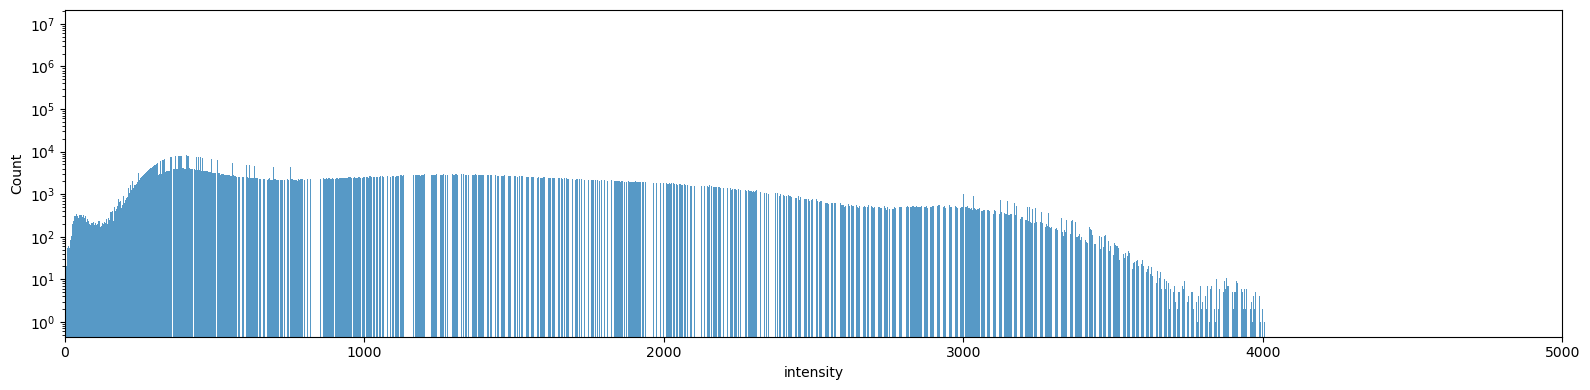

In [14]:
fig = plt.figure(figsize=(16,4))
ax = sns.histplot(data=df,x="intensity",weights="count",bins=np.arange(0,65537,1),binrange=(0,65536))
#plt.xticks(bin[:-1]) # seta o nro de barras
plt.semilogy() # testando
plt.xlim(0,5000)
#plt.ticklabel_format(style='plain', axis="y") # nao funciona se tiver em log o eixo especificado
fig.tight_layout()
plt.show()

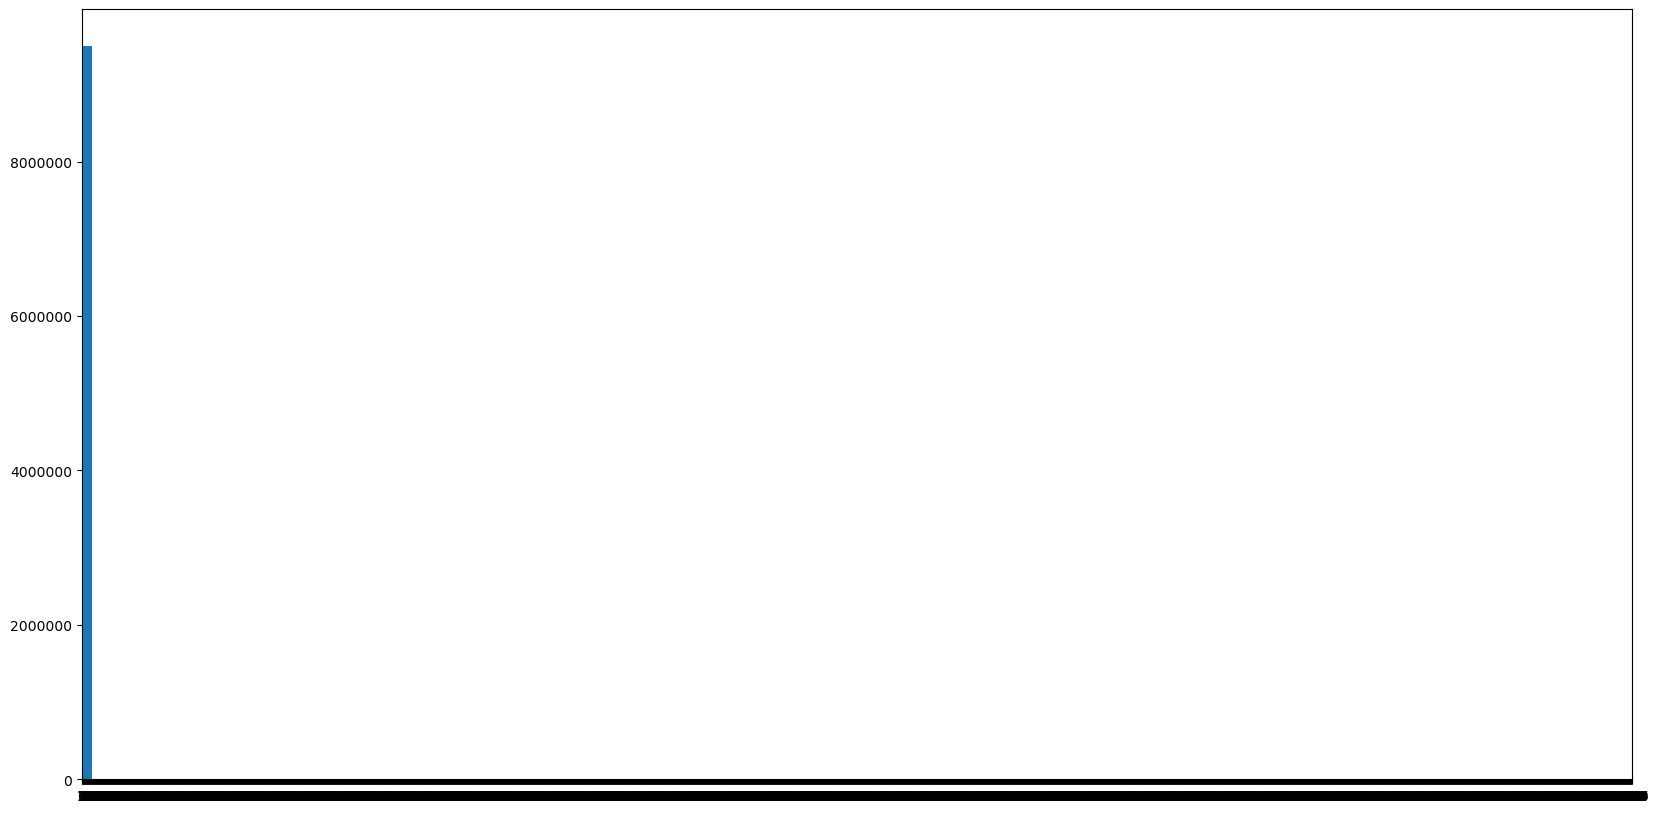

In [8]:
# Esse aqui nao funcionou
fig, plots = plt.subplots(figsize=(20,10))
plots.ticklabel_format(useOffset=True, style='plain')
plots.bar(bin[:-1] - 0.2, hist, width=65536./1000)
plt.xticks(bin[:-1])
plt.xlim(0,5000)
plt.show()